# **Exploratory Data Analysis of Hospatality Domain**

**EDA is the process of exploring,investigating and gathering insights from data using stastical measures and visualization. The objective of this analysis is to develop and understand the data by uncovering trends,relationship and pattern.**

ATLIQ GRANDS is one of the promising hotel chain company of India. It operates in various cities of india and also they have been in industry for over 20 years.
The bookings of hotel will take place through different platforms available.
Now the challenge they are facing is , they are loosing their revenue and their mrket share. In order to find the solution for this , first we need to explore the data using EDA method , where we will be using Python and its libraries.

Here in this project we will be using the Python libraries like Pandas.

We will be covering certain topics in this analysis:

1.Collecting the Dataset from an online source.

2.Data exploration using Pandas.

3.Data cleaning and Transformation.

4.Insights generation from the data and answers for the questions.

5.Summary and conclusion

This project is all about collecting, cleaning and transforming the data gathered from a Hospatality data from Atliq Grands ,where we will find out in what place they are loosing their revenue.

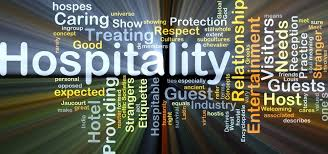

**STEP 1 : DATA EXPLORATION**

In [1]:
import pandas as pd

In [2]:
df_bookings=pd.read_csv("/content/fact_bookings.csv")

In [4]:
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [5]:
df_bookings.shape

(134590, 12)

In [7]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [8]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [10]:
df_bookings.booking_platform.value_counts()

,count
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


<Axes: ylabel='booking_platform'>

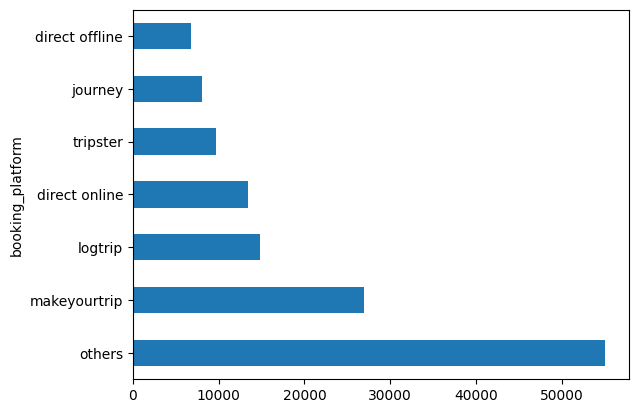

In [12]:
df_bookings.booking_platform.value_counts().plot(kind="barh")

In [13]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [18]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()


(6500, 28560000)

In [19]:
df_date=pd.read_csv("/content/dim_date.csv")
df_hotels=pd.read_csv("/content/dim_hotels.csv")
df_rooms=pd.read_csv("/content/dim_rooms.csv")
df_agg_bookings=pd.read_csv("/content/fact_aggregated_bookings.csv")

In [20]:
df_hotels.shape

(25, 4)

In [21]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [22]:
df_hotels.category.value_counts()

,count
category,
Luxury,16
Business,9


<Axes: ylabel='city'>

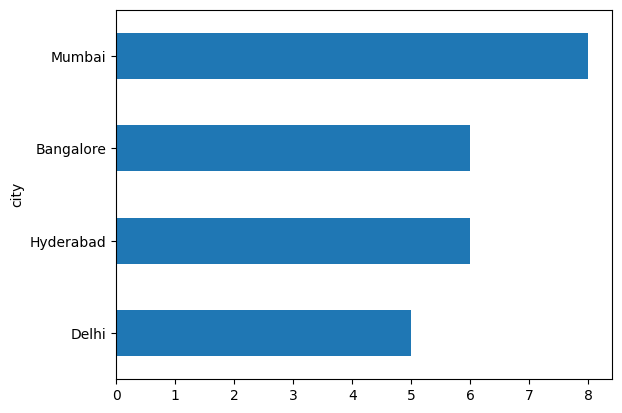

In [24]:
df_hotels.city.value_counts().sort_values().plot(kind="barh")

In [25]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [26]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

## STEP 2 :DATA CLEANING

In [32]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [33]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [34]:
df_bookings.shape

(134590, 12)

In [35]:
df_bookings[df_bookings.no_guests>0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [36]:
df_bookings=df_bookings[df_bookings.no_guests>0]

In [38]:
df_bookings.shape

(134578, 12)

In [42]:
avg,std=df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std(),

In [43]:
avg,std

(15378.036937686695, 93040.15493143328)

In [44]:
highest_cost=avg+3*std

In [45]:
highest_cost

294498.50173198653

In [46]:
lowest_cost=avg-3*std

In [47]:
lowest_cost

-263742.4278566132

In [48]:
df_bookings[df_bookings.revenue_generated>highest_cost]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [50]:
df_bookings=df_bookings[df_bookings.revenue_generated<highest_cost]

In [51]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [52]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [55]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

,revenue_realized
count,16071.000000
mean,23439.308444
std,9048.599076
min,7600.000000
25%,19000.000000
50%,26600.000000
75%,32300.000000
max,45220.000000


In [57]:
23439+3*9048

50583

In [59]:
df_bookings.isnull().sum()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,77897
booking_status,0


**STEP 3: DATA TRANSFORMATION**

In [60]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [67]:
df_agg_bookings["occ_pct"]=(df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]*100)

In [68]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
3,17558,1-May-22,RT1,30,19.0,157.894737
4,16558,1-May-22,RT1,18,19.0,94.736842


**STEP 4: INSIGHTS Generation**

**1.What is an average occupancy rate in each of the room categories?**

In [69]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

,occ_pct
room_category,
RT1,58.22
RT2,58.04
RT3,58.03
RT4,59.30


In [70]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [73]:
df=pd.merge(df_agg_bookings,df_rooms,left_on="room_category",right_on="room_id")

In [74]:
df.groupby("room_class")["occ_pct"].mean().round(2)

,occ_pct
room_class,
Elite,58.04
Premium,58.03
Presidential,59.30
Standard,58.22


In [75]:
df.drop("room_id",axis=1,inplace=True)

In [76]:
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.333333,Standard
1,19562,1-May-22,RT1,28,30.0,93.333333,Standard
2,19563,1-May-22,RT1,23,30.0,76.666667,Standard
3,17558,1-May-22,RT1,30,19.0,157.894737,Standard
4,16558,1-May-22,RT1,18,19.0,94.736842,Standard


**2.Print average occupancy rate per city**

In [77]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [80]:
df=pd.merge(df,df_hotels,on="property_id")
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y
0,16559,1-May-22,RT1,25,30.0,83.333333,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.333333,Standard,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.666667,Standard,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.894737,Standard,Atliq Grands,Luxury,Mumbai,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,94.736842,Standard,Atliq Grands,Luxury,Delhi,Atliq Grands,Luxury,Delhi


<Axes: ylabel='city_x'>

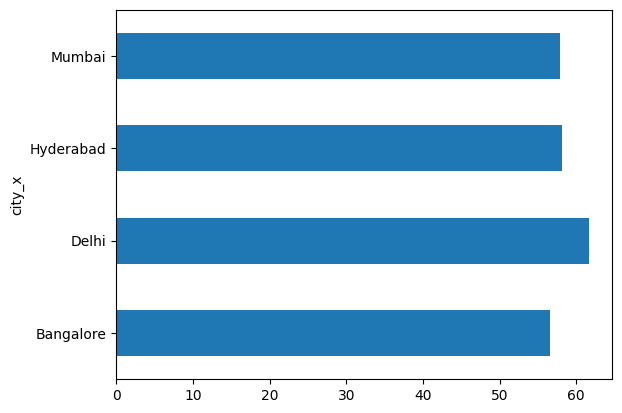

In [84]:
df.groupby("city_x")["occ_pct"].mean().plot(kind="barh")

**3. When was the occupancy better, weekend or weekday?**

In [85]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y
0,16559,1-May-22,RT1,25,30.0,83.333333,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.333333,Standard,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.666667,Standard,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore


In [86]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [88]:
df=pd.merge(df,df_date,left_on="check_in_date",right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.724138,Premium,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.333333,Standard,Atliq City,Business,Hyderabad,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.000000,Standard,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [89]:
df.groupby("day_type")["occ_pct"].mean().round(2)

,occ_pct
day_type,
weekeday,50.90
weekend,72.39


4. **Print revenue realized per city**

In [90]:
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [91]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [92]:
df_bookings_all=pd.merge(df_bookings,df_hotels,on="property_id")
df_bookings_all.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [93]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

,revenue_realized
city,
Bangalore,420383550
Delhi,294404488
Hyderabad,325179310
Mumbai,668569251


**Conclusion**

From the above analysis we got to know about the revenue generated per each city and occupancy rate at each city and much more. In this analysis we have used pandas which is python library and we have gathered the insight of this data set.

****